# Violinplots

Welcome to the class. Today we will make a Violinplot. It is very similar to boxplot, excepy it also shows probability density at different values.

In other words, it combines boxplot and kde plot.

In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
For this class we will use Cryptocurrency historical data

'''
d = pd.read_csv('Data/altcoins.csv')

# quick of the dataframe
d.fillna(0, inplace=True)
d.head()

,Date,BTC,ETH,ETC,ZEC,DASH,LTC
0,4/28/2013,134.21,0.0,0.0,0.0,0.0,4.35
1,4/29/2013,144.54,0.0,0.0,0.0,0.0,4.38
2,4/30/2013,139.00,0.0,0.0,0.0,0.0,4.30
3,5/1/2013,116.99,0.0,0.0,0.0,0.0,3.80
4,5/2/2013,105.21,0.0,0.0,0.0,0.0,3.37


In this dataframe, we are interested in closing prices of Ethereum and Dash.and want to visualize the first quartile, 3rd quartile, median price, upper extreme, lower extreme and identify outliers if any. I am basically saying, let's make a boxplot.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1649afa95c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1649afa9f28>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1649ae51780>,
 'cmins': <matplotlib.collections.LineCollection at 0x1649afa9c88>}

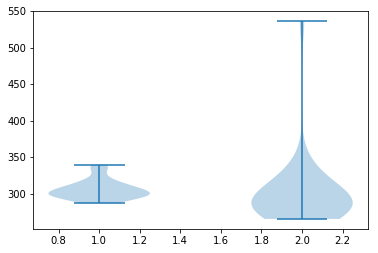

In [17]:
# Instantiate a figure
fig, ax = plt.subplots()

# Let's analyze the last 30 days
# of bitcoin prices
data = d.tail(30)

# Let's choose the two columns
# and make a list
l=[data.ETH, data.DASH]

# Let's a bare-bone boxplot
ax.violinplot(l)

Look at the output above the chart. So when you call violinplot method, it returns a dictionary of 
1. bodies
2. cbars
3. cmaxes - or outliers.
4. cmins

This means, just like boxplots we can easily single out every single component of the boxplot and make customizations as needed. Though, you can pass a lot of parameters not only after making a plot. Just call help function to explore your options, like below:

In [18]:
help(ax.violinplot)

Help on method violinplot in module matplotlib.axes._axes:

violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a violin plot.
    
    Make a violin plot for each column of *dataset* or each vector in
    sequence *dataset*.  Each filled area extends to represent the
    entire data range, with optional lines at the mean, the median,
    the minimum, and the maximum.
    
    Parameters
    ----------
    dataset : Array or a sequence of vectors.
      The input data.
    
    positions : array-like, default = [1, 2, ..., n]
      Sets the positions of the violins. The ticks and limits are
      automatically set to match the positions.
    
    vert : bool, default = True.
      If true, creates a vertical violin plot.
      Otherwise, creates a horizontal violin plot.
    
    widths : array-like, default = 0.5
     

Take your time to read through. It is a very short documentation. 
Alright, assuming you have read the documentation, let's get down to customizing the violinplot.

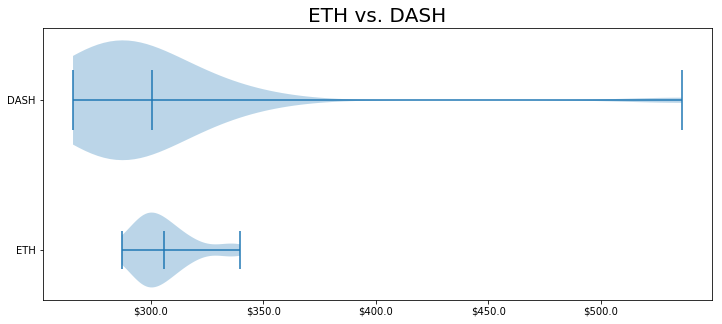

In [19]:
# We will make brand new violinplots,
# but this time we will pass a few parameters

fig1, ax1 = plt.subplots(figsize=(12,5))


# This time plot violinplot with few 
# parameters
vp = ax1.violinplot(l, 
                 vert=False, 
                widths=[0.5, 0.8],
                showmeans=True)


# set the title
ax1.set_title('ETH vs. DASH', size=20)

# we don't need all those ticks and lables
# two ticks and two labels will do
ax1.set_yticks([1,2])
ax1.set_yticklabels(['ETH','DASH'])

# let's format the xaxis and add $ symbol
from matplotlib.ticker import StrMethodFormatter

mft = StrMethodFormatter("${x}")
ax1.xaxis.set_major_formatter(mft)


let's recall what violinplot returns

In [20]:
vp

{'bodies': [<matplotlib.collections.PolyCollection at 0x1649b00fa90>,
 'cbars': <matplotlib.collections.LineCollection at 0x1649b01d6d8>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1649b01d198>,
 'cmeans': <matplotlib.collections.LineCollection at 0x1649af16630>,
 'cmins': <matplotlib.collections.LineCollection at 0x1649b01d438>}

We can select the needed component from dictionary and make necessary changes, like we will do now.

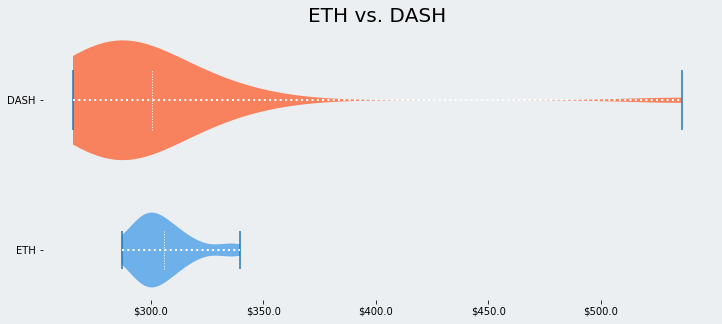

In [21]:
# First, let us change the axes and figure colors
fig1.set_facecolor('#ECEFF1')
ax1.set_facecolor('#ECEFF1')


# Select the bodies and apply colors
vp['bodies'][0].set(alpha=100, facecolor='#1E88E5')
vp['bodies'][1].set(alpha=100, facecolor='#FF3D00')

# Select the lines, splitting the bodies into to equal halves
# and make some changes
vp['cbars'].set(linewidth=2, color='w', linestyle='dotted')

# We can also choose the line representing mean and 
# alter them
vp['cmeans'].set(linewidth=1, color='w', linestyle='dotted')


# Finally, let's remove the spines
spines=['bottom','top','left','right']

for s in spines:
    ax1.spines[s].set_visible(False)

    
fig1

Ok. Now you know how to create and customize violinplots. If you have any questions so far, please let me know and bye for now